In [1]:
pip install surprise

     |████████████████████████████████| 11.8 MB 3.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630182 sha256=ea3a002fb3cd262a9df0ad27bff0007cc1bc9f1a435db93e63f3d1243dfb8fc2
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from surprise import Reader, Dataset, accuracy
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate, KFold, train_test_split
from sklearn.metrics import roc_curve, auc, mean_squared_error
from surprise.prediction_algorithms.matrix_factorization import NMF, SVD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = '/content/drive/MyDrive/Synthetic_Movie_Lens/'
Ratings_file = pd.read_csv(df+"ratings.csv",usecols=['userId','movieId','rating']) 

In [4]:
Ratings_file

,userId,movieId,rating
0,496,112852,3.0
1,391,1947,4.0
2,387,1562,1.5
3,474,2716,4.5
4,483,88125,4.5
...,...,...,...
100831,469,1219,4.0
100832,599,3571,2.0
100833,414,276,3.0
100834,395,168,3.0


In [5]:
user_ID = Ratings_file.pop('userId').values
movie_ID = Ratings_file.pop('movieId').values
rating = Ratings_file.pop('rating').values
sparsity = len(rating)/(len(set(movie_ID))*len(set(user_ID)))
print('Sparsity:',sparsity)

Sparsity: 0.016999683055613623


In [9]:
u, inv = np.unique(rating, return_counts=True)

In [10]:
u

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [11]:
inv

array([ 1370,  2811,  1791,  7551,  5551, 20046, 13136, 26816,  8553,
       13211])

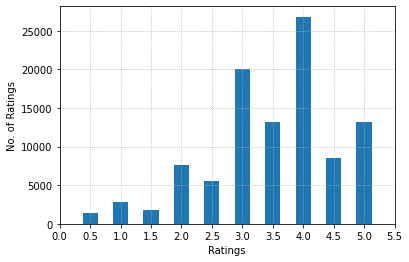

In [12]:
plt.bar(u, inv, width=0.25)
locs, labels = plt.xticks()  
plt.grid(linestyle=':')
plt.xticks(np.arange(0,6,0.5),rotation=0)
plt.ylabel('No. of Ratings')
plt.xlabel('Ratings')
plt.savefig('Q2.png',dpi=300,bbox_inches='tight')
plt.show()

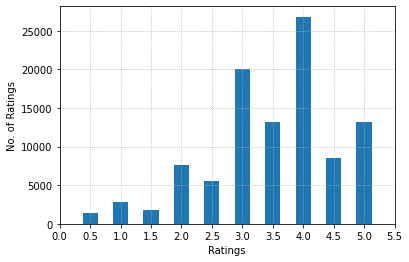

In [13]:
u, inv = np.unique(rating, return_inverse=True)
plt.bar(u, np.bincount(inv), width=0.25)
locs, labels = plt.xticks()  
plt.grid(linestyle=':')
plt.xticks(np.arange(0,6,0.5),rotation=0)
plt.ylabel('No. of Ratings')
plt.xlabel('Ratings')
plt.savefig('Q2.png',dpi=300,bbox_inches='tight')
plt.show()

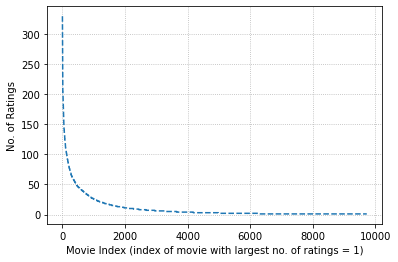

In [14]:
u, c = np.unique(movie_ID, return_counts=True)
plt.plot(range(1,len(u)+1),c[np.argsort(c)[::-1]],linestyle='--')
plt.grid(linestyle=':')
plt.ylabel('No. of Ratings')
plt.xlabel('Movie Index (index of movie with largest no. of ratings = 1)')
plt.savefig('Q3.png',dpi=300,bbox_inches='tight')
plt.show()

In [15]:
movie_count_dict = {} 
x = list(range(1,len(unique)+1))
for key in unique[np.argsort(counts)[::-1]]: 
    for value in x: 
        movie_count_dict[key] = value 
        x.remove(value) 
        break 
print('Top 10 rated movies (Movie ID, Index):')
print(list(movie_count_dict.items())[0:10])

Top 10 rated movies (Movie ID, Index):
[(356, 1), (318, 2), (296, 3), (593, 4), (2571, 5), (260, 6), (480, 7), (110, 8), (589, 9), (527, 10)]


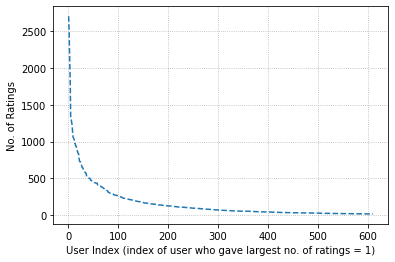

In [16]:
u, c = np.unique(user_ID, return_counts=True)
plt.plot(range(1,len(u)+1),c[np.argsort(c)[::-1]],linestyle='--')
plt.grid(linestyle=':')
plt.ylabel('No. of Ratings')
plt.xlabel('User Index (index of user who gave largest no. of ratings = 1)')
plt.savefig('Q4.png',dpi=300,bbox_inches='tight')
plt.show()

In [17]:
user_count_dict = {} 
x = list(range(1,len(unique)+1))
for key in unique[np.argsort(counts)[::-1]]: 
    for value in x: 
        user_count_dict[key] = value 
        x.remove(value) 
        break 
print('Top 10 users who rated most number of times (User ID, Index):')
print(list(user_count_dict.items())[0:10])

Top 10 users who rated most number of times (User ID, Index):
[(356, 1), (318, 2), (296, 3), (593, 4), (2571, 5), (260, 6), (480, 7), (110, 8), (589, 9), (527, 10)]


In [18]:
unique_movie_ID = list(set(movie_ID))
movie_ID_list = []
var_list = []
for j in range(len(unique_movie_ID)):
    indices = [i for i, x in enumerate(movie_ID) if x == unique_movie_ID[j]]
    var = np.var(np.array(rating[indices]))
    movie_ID_list.append(unique_movie_ID[j])
    var_list.append(var)

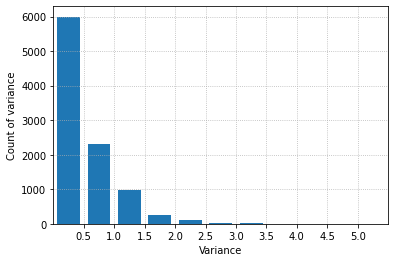

In [19]:
plt.hist(var_list, bins=np.arange(0,5.5,0.5),rwidth=0.75)
plt.xticks(np.arange(0.5,5.5,0.5))
plt.xlim([0, 5.5])
plt.grid(linestyle=':')
plt.xlabel('Variance')
plt.ylabel('Count of variance')
plt.savefig('Q6.png',dpi=300,bbox_inches='tight')
plt.show()

In [20]:
rd = pd.read_csv(df+"ratings.csv",index_col = 0)

In [21]:
rd

,userId,movieId,rating,timestamp
0,496,112852,3.0,1415520462
1,391,1947,4.0,1030945141
2,387,1562,1.5,1095041022
3,474,2716,4.5,1053020930
4,483,88125,4.5,1311337237
...,...,...,...,...
100831,469,1219,4.0,965661925
100832,599,3571,2.0,1498511343
100833,414,276,3.0,961596299
100834,395,168,3.0,841503984


In [22]:
rd.to_csv('file.csv', index=False)

In [23]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/out1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
rd.to_csv(filepath,index = False)  

In [24]:
reader = Reader(line_format='user item rating timestamp',sep=',',rating_scale=(0.5, 5),skip_lines=1)
ratings_dataset = Dataset.load_from_file('/content/drive/MyDrive/out1.csv',reader = reader)

In [25]:
k = np.arange(2,102,2)
rmse = []
mae = []
for item in k:
    print('Testing for k =',item)
    res = cross_validate(KNNWithMeans(k=item,sim_options={'name':'pearson'}),
                         measures=['rmse','mae'],data = ratings_dataset,cv=10,n_jobs=-1)   
    rmse.append(np.mean(res['test_rmse']))
    mae.append(np.mean(res['test_mae']))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


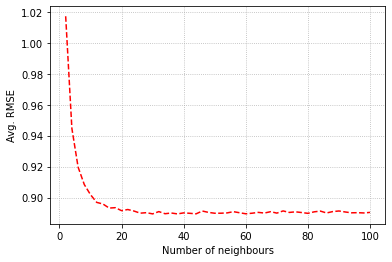

In [26]:
plt.plot(k,rmse,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q10a.png',dpi=300,bbox_inches='tight')
plt.show()

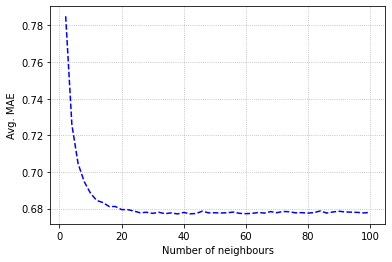

In [27]:
plt.plot(k,mae,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.ylabel('Avg. MAE')
plt.xlabel('Number of neighbours')
plt.savefig('Q10b.png',dpi=300,bbox_inches='tight')
plt.show()

In [30]:
min_value = min(rmse)
min_index = rmse.index(min_value)
min_mae = min(mae)
print('min value of rmse =',min_value)

print('min index=',min_index)

print('min value of mae =',min_mae)


min value of rmse = 0.889394202222352
min index= 18
min value of mae = 0.6771145304542264


## **POPULAR TRIMMING**


---





In [31]:
rmse_pop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]<=2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_pop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


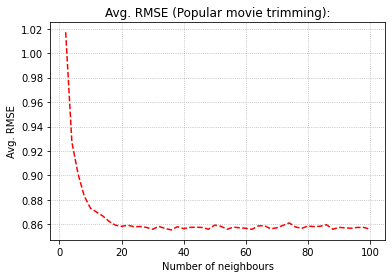

In [32]:
plt.plot(k,rmse_pop,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (Popular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q12.png',dpi=300,bbox_inches='tight')
plt.show()

In [33]:
print("Minimum avg. RMSE (Popular movie trimming) and its index :", min(rmse_pop), rmse_pop.index(min(rmse_pop)))

Minimum avg. RMSE (Popular movie trimming) and its index : 0.8554433736275546 17


## **UNPOPULAR TRIMMING**


---





In [34]:
rmse_unpop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]>2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_unpop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


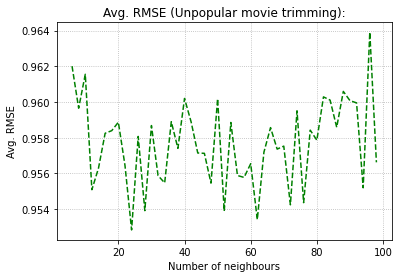

In [35]:
plt.plot(k[2:-1],rmse_unpop[2:-1],linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (Unpopular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q13.png',dpi=300,bbox_inches='tight')
plt.show()

In [36]:
print("Minimum avg. RMSE (Unpopular movie trimming):", min(rmse_unpop))

Minimum avg. RMSE (Unpopular movie trimming): 0.9528338629596529


## **HIGH VARIANCE TRIMMING**


---





In [37]:
rmse_var = []
kf =  KFold(n_splits=10)
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
        res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_var.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


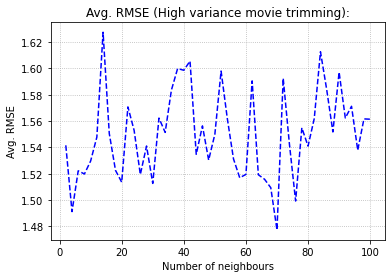

In [38]:
plt.plot(k,rmse_var,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (High variance movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q14.png',dpi=300,bbox_inches='tight')
plt.show()

In [39]:
print("Minimum avg. RMSE (Unpopular movie trimming):", min(rmse_unpop))

Minimum avg. RMSE (Unpopular movie trimming): 0.9528338629596529


In [40]:
k = 20
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res  = KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)

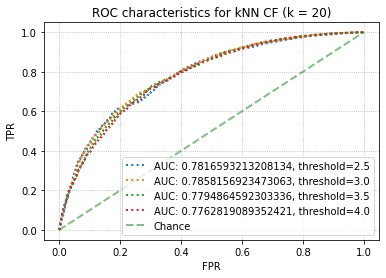

In [41]:
fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for kNN CF (k = 20)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Q15.png',dpi=300,bbox_inches='tight')
plt.show() 

In [42]:
k = 20
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res  = KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)

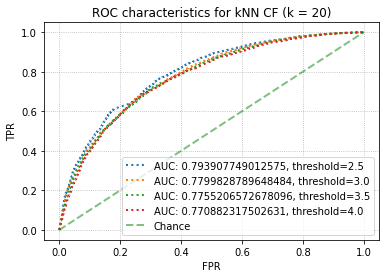

In [43]:
fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for kNN CF (k = 20)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Q15.png',dpi=300,bbox_inches='tight')
plt.show() 

## **UNPOPULAR TRIMMING WITH NMF**


---





In [45]:
k = np.arange(2,52,2)
rmse_NMF = []
mae_NMF = []

kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]>2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = NMF(n_factors=item,n_epochs=50,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_NMF_unpop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


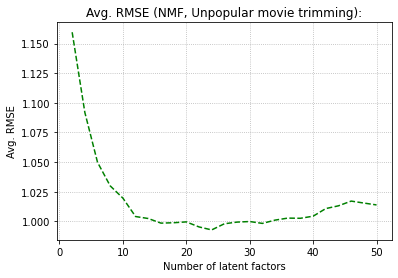

In [46]:
plt.plot(k,rmse_NMF_unpop,linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (NMF, Unpopular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q20.png',dpi=300,bbox_inches='tight')
plt.show()

In [47]:
print("Minimum avg. RMSE (NMF, Unpopular movie trimming):", min(rmse_NMF_unpop))

Minimum avg. RMSE (NMF, Unpopular movie trimming): 0.9927708272754183


## **QUESTION 9**

---



---



In [50]:
genre = pd.read_csv(df+'movies.csv',usecols=['movieId','title','genres'])
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
nmf = NMF(n_factors=20,n_epochs=50,verbose=False)
nmf.fit(trainset).test(testset)
U = nmf.pu
V = nmf.qi

In [53]:
cols = [1,3,5,7,11,15,19]
for item in cols:
    print('Column number of V: ',item)
    selected_col = V[:,item]
    sorted_col = np.argsort(selected_col)[::-1]
    for i in sorted_col[0:10]:
        print(genre['genres'][i])
    print('________________________________________________\n')

Column number of V:  1
Drama
Drama
Adventure|Animation|Comedy
Animation|Drama|Romance
Thriller
Comedy|Drama|Romance
Drama|War|Western
Drama
Fantasy|Horror
Comedy|Romance
________________________________________________

Column number of V:  3
Comedy|Horror
Action|Comedy|Crime
Comedy
Action|Sci-Fi
Drama|Romance
Mystery|Thriller
Comedy|Drama|Romance
Comedy|Drama
Drama|War
Action|Adventure|Sci-Fi
________________________________________________

Column number of V:  5
Action|Comedy|Crime|Drama
Comedy|Romance
Comedy
Adventure|Comedy|Thriller
Drama|Romance
Action|Crime|Sci-Fi|Thriller
Comedy|Romance
Drama|Romance|Sci-Fi
Romance|Sci-Fi
Comedy|Crime|Drama|Romance|Thriller
________________________________________________

Column number of V:  7
Comedy|Drama|Romance
Adventure|Comedy|Thriller
Drama|Film-Noir|Mystery|Thriller
Comedy
Comedy|Drama|Romance
Drama|Romance
Crime
Horror|Thriller
Action|Crime|Drama|Thriller
Comedy|Drama|Romance
________________________________________________

Column num

## **QUESTION 10**

---



---



In [54]:
k = np.arange(2,52,2)
rmse_SVD = []
mae_SVD = []
for item in k:
    print('Testing for k =',item)
    res = cross_validate(SVD(n_factors=item,n_epochs=20,verbose=False),
                         measures=['rmse','mae'],data = ratings_dataset,cv=10,n_jobs=-1)   
    rmse_SVD.append(np.mean(res['test_rmse']))
    mae_SVD.append(np.mean(res['test_mae']))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


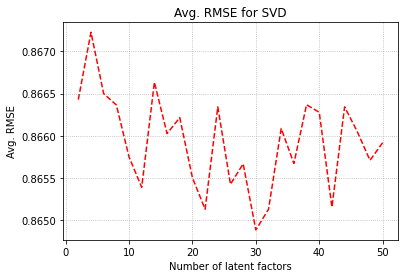

In [55]:
plt.plot(k,rmse_SVD,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Avg. RMSE for SVD')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q24a.png',dpi=300,bbox_inches='tight')
plt.show()

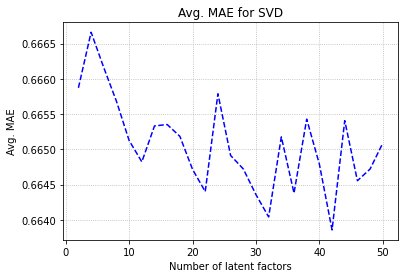

In [56]:
plt.plot(k,mae_SVD,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Avg. MAE for SVD')
plt.ylabel('Avg. MAE')
plt.xlabel('Number of latent factors')
plt.savefig('Q24b.png',dpi=300,bbox_inches='tight')
plt.show()


In [57]:
print("Minimum avg. RMSE (SVD): %f, value of k: %d" % (min(rmse_SVD),k[[i for i, x in enumerate(rmse_SVD) if x == min(rmse_SVD)][0]]))
print("Minimum avg. MAE (SVD): %f, value of k: %d" % (min(mae_SVD),k[[i for i, x in enumerate(mae_SVD) if x == min(mae_SVD)][0]]))

Minimum avg. RMSE (SVD): 0.864886, value of k: 30
Minimum avg. MAE (SVD): 0.663856, value of k: 42


## **POPULAR TRIMMING**

---




In [58]:
rmse_SVD_pop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]<=2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_SVD_pop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


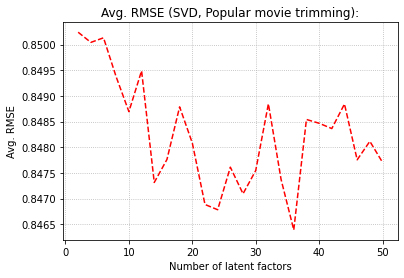

In [59]:
plt.plot(k,rmse_SVD_pop,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (SVD, Popular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q26.png',dpi=300,bbox_inches='tight')
plt.show()


In [60]:
print("Minimum avg. RMSE (SVD, Popular movie trimming):", min(rmse_SVD_pop))

Minimum avg. RMSE (SVD, Popular movie trimming): 0.8463890602301163


## **UNPOPULAR TRIMMING**

---




In [61]:
rmse_SVD_unpop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]>2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_SVD_unpop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


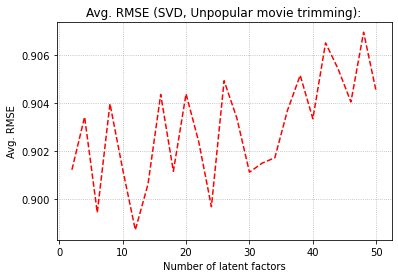

In [62]:
plt.plot(k,rmse_SVD_unpop,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (SVD, Unpopular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q27.png',dpi=300,bbox_inches='tight')
plt.show()

In [63]:
print("Minimum avg. RMSE (SVD, Unpopular movie trimming):", min(rmse_SVD_unpop))

Minimum avg. RMSE (SVD, Unpopular movie trimming): 0.8987093543005559


## **HIGH VARIANCE TRIMMING**

---




In [64]:
rmse_SVD_var = []
kf =  KFold(n_splits=10)
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_SVD_var.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


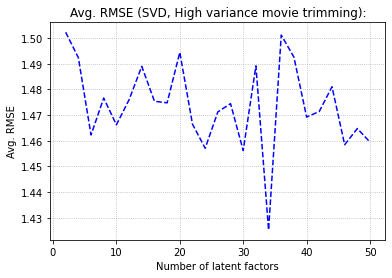

In [65]:
plt.plot(k,rmse_SVD_var,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (SVD, High variance movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q28.png',dpi=300,bbox_inches='tight')
plt.show()

In [66]:
print("Minimum avg. RMSE (SVD, High variance movie trimming):", min(rmse_SVD_var))

Minimum avg. RMSE (SVD, High variance movie trimming): 1.4252245185915224


### ROC CURVES

In [67]:
k = k[[i for i, x in enumerate(rmse_SVD) if x == min(rmse_SVD)][0]]
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res  = SVD(n_factors=k,n_epochs=20,verbose=False).fit(trainset).test(testset)

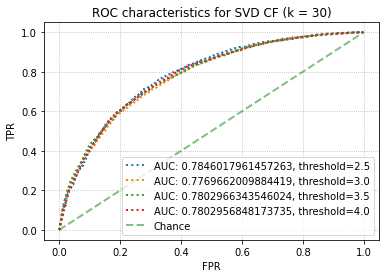

In [68]:
fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for SVD CF (k = '+ str(k)+')')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Q29.png',dpi=300,bbox_inches='tight')
plt.show()